# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

Predicting sales using multiple linear regression provides businesses with valuable insights into how different marketing strategies influence revenue. By quantifying the impact of various promotional channels—such as TV advertising, influencer partnerships, radio, and social media. Companies can identify which investments drive the highest returns. This data-driven approach enables more efficient allocation of marketing budgets, reduces unnecessary spending on less effective channels, and supports strategic planning for future campaigns. Ultimately, it empowers decision-makers to boost sales performance and maximize overall marketing effectiveness.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
print(data.head())
```

---

In [9]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

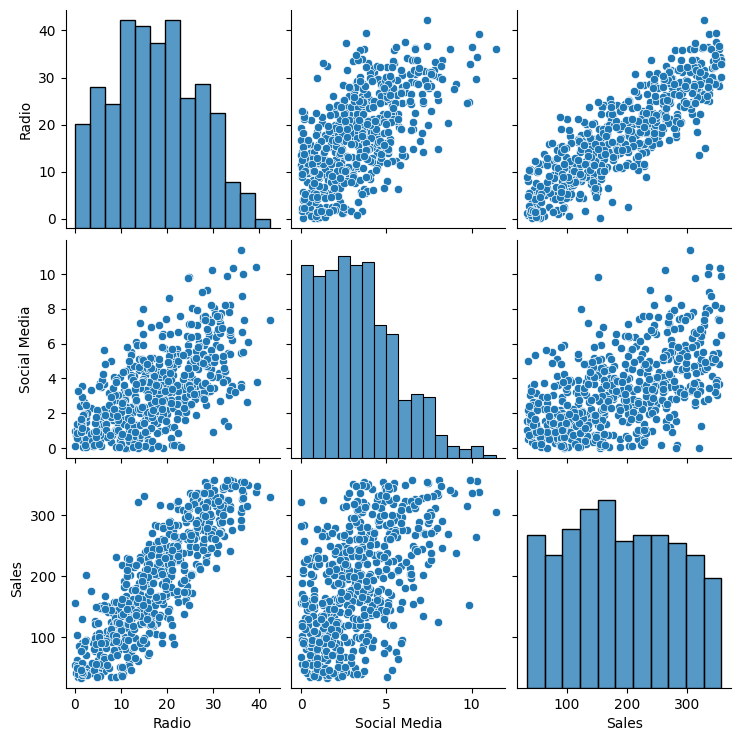

In [10]:
# prompt: Create a pairplot to visualize the relationships between continuous variables in the dataset.

import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the continuous variables
sns.pairplot(df)
plt.show()



## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [11]:
# Drop rows with missing values
df = df.dropna()

# Encode categorical variables (if needed)
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# If there are categorical columns, encode them using one-hot encoding
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()


,Radio,Social Media,Sales,TV_Low,TV_Medium,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,3.518070,2.293790,55.261284,True,False,False,True,False
1,7.756876,2.572287,67.574904,True,False,True,False,False
2,20.348988,1.227180,272.250108,False,False,False,True,False
3,20.108487,2.728374,195.102176,False,True,True,False,False
4,31.653200,7.776978,273.960377,False,False,False,False,True


In [15]:
df = df.rename(columns={'Social Media': 'Social_Media'})
df.columns


Index(['Radio', 'Social_Media', 'Sales', 'TV_Low', 'TV_Medium',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [16]:
import statsmodels.formula.api as smf

# Define the OLS formula (assuming 'sales' is the dependent variable)
formula = 'Sales ~ Radio + Social_Media + TV_Low + TV_Medium + ' \
          'Influencer_Mega + Influencer_Micro + Influencer_Nano'

# Fit the model
model = smf.ols(formula=formula, data=df)
results = model.fit()

# Display the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        12:51:57   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

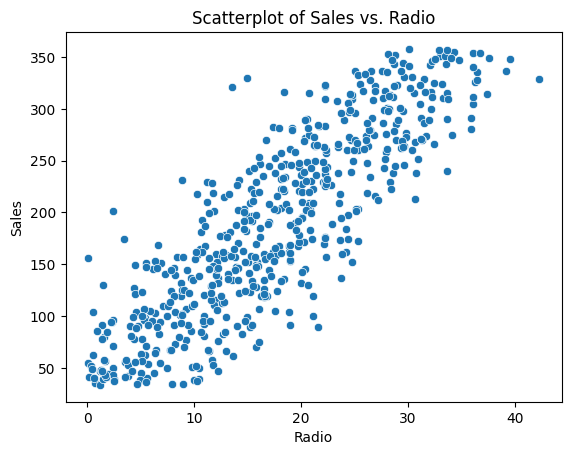

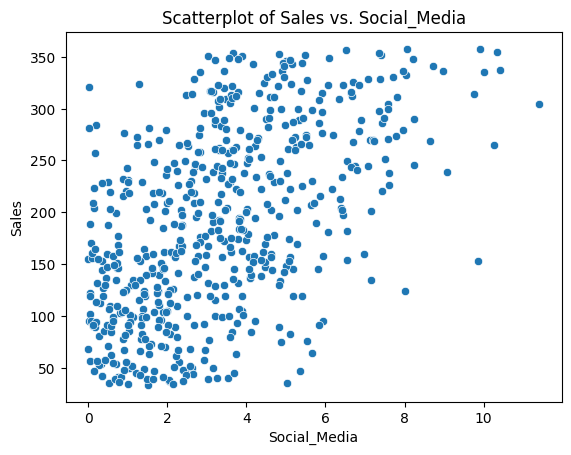

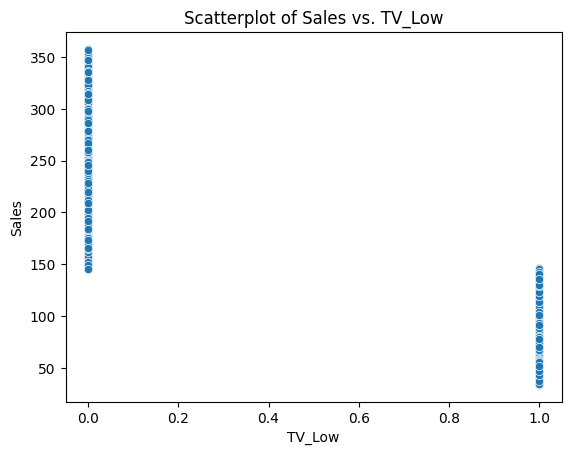

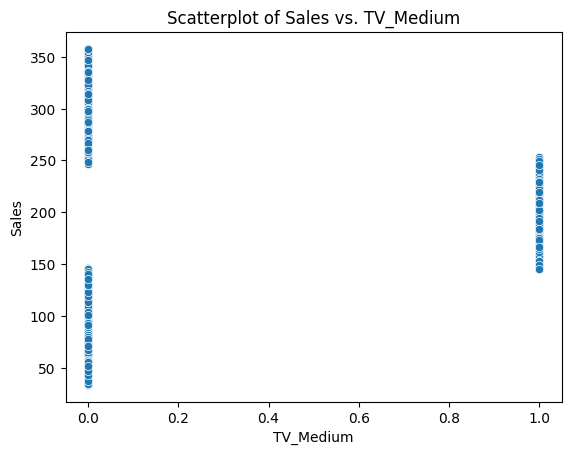

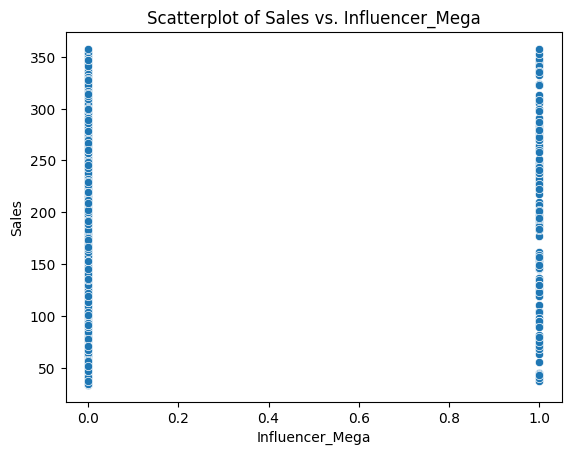

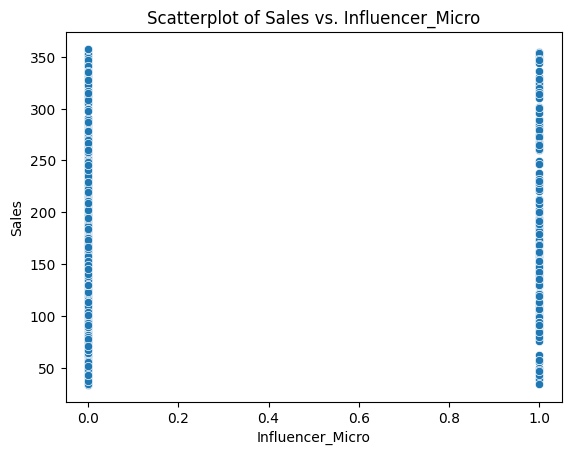

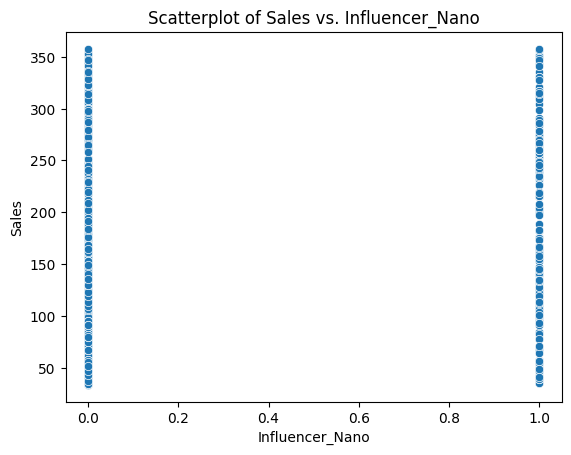

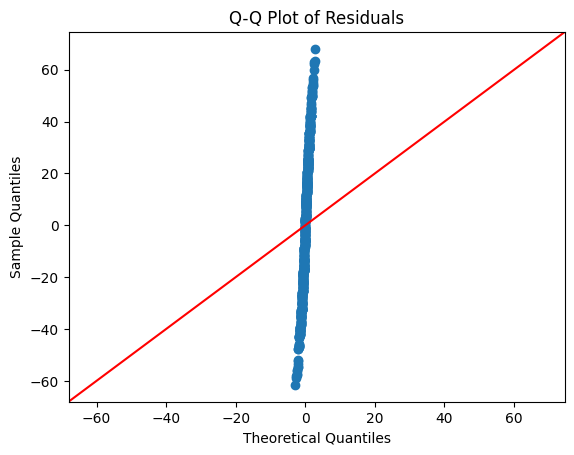

In [17]:
import statsmodels.api as sm

# Create scatterplots for linearity
for col in ['Radio', 'Social_Media', 'TV_Low', 'TV_Medium', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']:
    sns.scatterplot(x=df[col], y=df['Sales'])
    plt.title(f'Scatterplot of Sales vs. {col}')
    plt.show()

# Calculate residuals
residuals = results.resid

# Create a Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()



## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [19]:
# Display the model summary (already done in the previous step)
print(results.summary())

# Interpret the coefficients
print("\nInterpretation of Coefficients:")
columns_to_interpret = [
    'Radio',
    'Social_Media',
    'TV_Low[T.True]',
    'TV_Medium[T.True]',
    'Influencer_Mega[T.True]',
    'Influencer_Micro[T.True]',
    'Influencer_Nano[T.True]'
]

for col in columns_to_interpret:
    coef = results.params[col]
    p_value = results.pvalues[col]
    print(f"- {col}:")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"  The coefficient for {col} is statistically significant at the 5% level.")
        if coef > 0:
            print(f"  A one unit increase in {col} is associated with an increase of {coef:.4f} in sales.")
        else:
            print(f"  A one unit increase in {col} is associated with a decrease of {abs(coef):.4f} in sales.")
    else:
        print(f"  The coefficient for {col} is not statistically significant at the 5% level.")
    print("-" * 20)

print(f"R-squared: {results.rsquared:.4f}")
print(f"Adjusted R-squared: {results.rsquared_adj:.4f}")

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Wed, 23 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        13:03:26   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

### **Key Takeaways from the Project**

This project demonstrated how **multiple linear regression** can be a powerful tool for understanding the impact of various marketing strategies on sales. With an **adjusted R-squared of 0.903**, the model explains over 90% of the variance in sales, indicating an excellent fit.

Importantly, it showed the need to **check assumptions of regression** (like multicollinearity, residual normality, and homoscedasticity) to ensure the model’s validity. We also learned that interpreting **coefficient values and p-values** allows us to distinguish between strategies that significantly affect sales and those that do not.

###  **Insights for Optimizing Marketing Strategies**

From the model results:

- **Radio advertising** is a **key driver of sales**: A one-unit increase is associated with a **~2.97 unit increase in sales**, and this is statistically significant.
- **TV ads (especially low and medium budget)** are associated with a **significant drop in sales**, suggesting these formats may not be effective or are poorly targeted.
- **Social media** and **influencer marketing (mega, micro, nano)** do not show statistically significant effects on sales, indicating a potential need to reevaluate how these channels are used or measured.

###  **Sharing Findings with the Team**

To communicate these insights effectively:
- **Prepare a slide presentation** with:
  - Visuals of **bar plots for coefficient sizes**
  - A table summarizing **significance levels**
  - A graph of **actual vs. predicted sales**
- Use **clear callouts** to highlight:
  - Strategies that positively or negatively impact sales
  - Any surprising non-significant variables (like Social Media)

###  **Recommendations to Stakeholders**

- **Increase investment in radio advertising**, as it strongly correlates with higher sales.
- **Reallocate budget from low and medium TV advertising**, which negatively affects sales.
- **Reassess the implementation of social media and influencer campaigns** to understand why they’re underperforming.
- Consider conducting **A/B tests or deeper segmentation** to find potential high-performing subgroups in influencer marketing.

